In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn

In [2]:
from torch.utils.data.dataset import Dataset

class RNNData(Dataset):
    def __init__(self):
        self.x = torch.zeros(26, 26, dtype=torch.float32)
        self.y = torch.arange(0, 26)
        self.x[self.y, self.y] = 1. # make one hot vec
        self.y = torch.remainder(self.y + 1, 26) # make predict next char
    
    def __len__(self):
        return self.y.shape[0]
    
    def __getitem__(self, index):
        x = self.x[index].view(1, -1)
        return x, self.y[index]

In [3]:
dataset = RNNData()

In [4]:
from torch.utils.data import DataLoader

batch_size = 1

dataloader = DataLoader(dataset, batch_size = batch_size)

In [5]:
class RNNModel(torch.nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = torch.nn.RNN(input_size = 26, hidden_size = 26, num_layers=1, batch_first=True)
    
    def forward(self, x):
        out, hid = self.rnn(x)
        return out

In [6]:
model = RNNModel()

In [7]:
criterion = torch.nn.CrossEntropyLoss() 

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr=.1)

In [9]:
class AverageMeter:
    def __init__(self):
        self.val = 0.
        self.avg = 0.
        self.sum = 0.
        self.count = 0.
    
    def update(self, val, n = 1):
        self.val = val
        self.sum = self.sum + val*n
        self.count = self.count + n
        self.avg = self.sum / self.count
    
    def get_avg(self):
        return self.avg

In [10]:
LOSSES = []

for epoch in range(20):
    
    averagemeter = AverageMeter()
    
    for x, y in dataloader:
        h_0 = torch.zeros(1,10,1)
        y_hat = model(x)
        loss = criterion(y_hat[:,-1,:], y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        averagemeter.update(val=loss.item())
    
    LOSSES.append(averagemeter.get_avg())


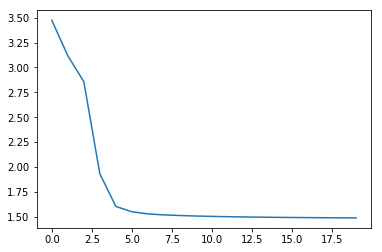

In [11]:
plt.plot(LOSSES[:])

In [12]:
with torch.no_grad():
    for x, y in dataloader:
        y_hat = model(x)
        print(y_hat[:, -1, :].argmax(dim=1), y)

tensor([1]) tensor([1])
tensor([2]) tensor([2])
tensor([3]) tensor([3])
tensor([4]) tensor([4])
tensor([5]) tensor([5])
tensor([6]) tensor([6])
tensor([7]) tensor([7])
tensor([8]) tensor([8])
tensor([9]) tensor([9])
tensor([10]) tensor([10])
tensor([11]) tensor([11])
tensor([12]) tensor([12])
tensor([13]) tensor([13])
tensor([14]) tensor([14])
tensor([15]) tensor([15])
tensor([16]) tensor([16])
tensor([17]) tensor([17])
tensor([18]) tensor([18])
tensor([19]) tensor([19])
tensor([20]) tensor([20])
tensor([21]) tensor([21])
tensor([22]) tensor([22])
tensor([23]) tensor([23])
tensor([24]) tensor([24])
tensor([25]) tensor([25])
tensor([0]) tensor([0])
